In [1]:
import numpy as np
import sys
from matplotlib import pylab as plt
%matplotlib inline

In [2]:
sys.path.append("..")
import fastcat as fc
pz=fc.photoz.PhotoZHist('./pzdist.txt')

../fastcat/photoz_Hist.py:36: RuntimeWarning: invalid value encountered in divide
  self.dataset[:, 3:] = (np.where(integrals!=0., self.dataset[:, 3:].T/integrals, 0.)).T


In [20]:
ztrue=np.array([0.7, 0.1])
arr=np.array(ztrue,dtype=[('z',np.float32)])
arr = pz.applyPhotoZ(arr)
arr

masked_array(data = [(0.699999988079071, 13, 2, 16) (0.10000000149011612, 2, 1, 65)],
             mask = [(False, False, False, False) (False, False, False, False)],
       fill_value = (1.0000000200408773e+20, 999999, 999999, 999999),
            dtype = [('z', '<f4'), ('iz', '<i8'), ('itype', '<i8'), ('imag', '<i8')])

(2, 901) (2, 901)


(-2, 2)

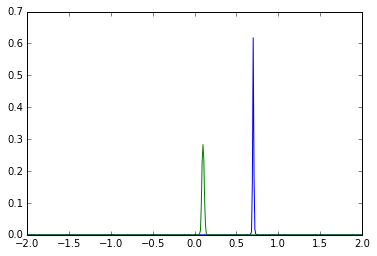

In [21]:
xs=arr['z'][:,np.newaxis]+pz.dz
ys=pz.getpdf(arr)
print xs.shape, ys.shape
[plt.plot(x,y) for x,y in zip(xs,ys)]
plt.xlim(-2, 2)

In [28]:
a=pz.PofZ(arr, 0.6, 1)
b=pz.cPofZ(arr, 1.5)
print a, b

[ 1.          0.66155759] [ 1.  1.]


In [6]:
#investigating pOfz
zpdz = arr['z'][:, np.newaxis]
a = pz.dz+zpdz
dz = 0.1
zc = 0.
mask = np.where(np.abs(zc-a)<dz/2, )
print np.diff(pz.dz)[0]
print mask
print a
#np.where?

0.01
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444]))
[[-3.800000011920929 -3.790000011920929 -3.7800000119209294
  -3.7700000119209296 -3.76000001192093 -3.75000001192093
  -3.7400000119209302 -3.7300000119209304 -3.7200000119209307
  -3.710000011920931 -3.700000011920931 -3.6900000119209313
  -3.6800000119209315 -3.6700000119209317 -3.660000011920932
  -3.650000011920932 -3.6400000119209324 -3.6300000119209326
  -3.620000011920933 -3.610000011920933 -3.600000011920933
  -3.5900000119209334 -3.5800000119209336 -3.570000011920934
  -3.560000011920934 -3.5500000119209343 -3.5400000119209345
  -3.5300000119209347 -3.520000011920935 -3.510000011920935
  -3.5000000119209353 -3.4900000119209356 -3.4800000119209358
  -3.470000011920936 -3.460000011920936 -3.4500000119209364
  -3.4400000119209366 -3.430000011920937 -3.420000011920937
  -3.4100000119209373 -3

In [7]:
print pz.dataset.shape
print pz.dz.shape
pz.z.shape[0]* pz.mag.shape[0]* pz.type.shape[0]

(21780, 904)
(901,)


21780

In [8]:
dataset = np.loadtxt('./pzdist.txt')

In [9]:
b=dataset[0]
a=dataset[600]
integral = a[3:].sum()
print integral
b=np.where(integral!=0., a[3:]/integral, 0.)
print b.sum()

3156.2784304
1.0


In [10]:
b=dataset[0]
a=dataset[600]
d=np.asarray([a,b])
print dataset.shape
integrals = dataset[:, 3:].sum(axis=1)
print integrals.shape
dd=np.where(integrals!=0., dataset[:, 3:].T/integrals.T, 0.)
dd=dd.T
print dd.shape
a =  dd[:, 3:].sum(axis=1)
print a[a>0]

(21780, 904)
(21780,)
(21780, 901)
[ 1.  1.  1. ...,  1.  1.  1.]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide
